# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from city import variable_name
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# print(cities)

Number of cities in the list: 587


In [3]:
# cities = cities[:5]

In [4]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
city_data = []

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# # Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")



# # Create counters
record_count = 1
set_count = 1


# # Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0


    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

   # Add 1 to the record count
    record_count += 1
    #print(response)
    try:
        latitude=(response["coord"]["lat"])
        temperature=(response["main"]["temp"])
        humidity=(response["main"]["humidity"])
        cloudiness=(response["clouds"]["all"])
        wind_speed=(response["wind"]["speed"])
#         final_cities=(response["name"])
        country=(response["sys"]["country"])
        longitude=(response["coord"]["lon"])
        date=(response["dt"])
        
        city_data.append({
            "City": city.title(),
            "Lat" : latitude,
            "Lng" : longitude,
            "Humidity": humidity,
            "Temp": temperature,
            "Clouds": cloudiness,
            "Wind": wind_speed,
            "Country": country,
            "Date": date
        })
        
    
        
    
    except:
        print("This city is not in the list")        
    
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

cities_df = pd.DataFrame(city_data)
cities_df.head()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | haiku-pauwela
Processing Record 2 of Set 1 | kapuskasing
Processing Record 3 of Set 1 | stornoway
Processing Record 4 of Set 1 | petropavlovsk-kamchatsky
Processing Record 5 of Set 1 | coquimbo
Processing Record 6 of Set 1 | shatrovo
Processing Record 7 of Set 1 | domna
Processing Record 8 of Set 1 | oodweyne
Processing Record 9 of Set 1 | saint-francois
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | panama city beach
Processing Record 12 of Set 1 | nova sintra
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | santyoku
Processing Record 21 of Set 1 | warka
Processing Record 22 of Set 1 | bela
P

Processing Record 37 of Set 4 | ola
Processing Record 38 of Set 4 | saint-joseph
Processing Record 39 of Set 4 | inari
Processing Record 40 of Set 4 | macapa
Processing Record 41 of Set 4 | westport
Processing Record 42 of Set 4 | lihue
Processing Record 43 of Set 4 | hilo
Processing Record 44 of Set 4 | tazacorte
Processing Record 45 of Set 4 | sarkand
Processing Record 46 of Set 4 | monrovia
Processing Record 47 of Set 4 | ponta delgada
Processing Record 48 of Set 4 | punta arenas
Processing Record 49 of Set 4 | bothaville
Processing Record 0 of Set 5 | fonte boa
Processing Record 1 of Set 5 | dudinka
Processing Record 2 of Set 5 | kolonia town
Processing Record 3 of Set 5 | remire-montjoly
Processing Record 4 of Set 5 | avarua
Processing Record 5 of Set 5 | banfora
Processing Record 6 of Set 5 | cordele
Processing Record 7 of Set 5 | ytyk-kyuyel'
This city is not in the list
Processing Record 8 of Set 5 | sarangani
Processing Record 9 of Set 5 | gorontalo
Processing Record 10 of Set

Processing Record 31 of Set 8 | boa vista
Processing Record 32 of Set 8 | inarajan village
Processing Record 33 of Set 8 | ibb
Processing Record 34 of Set 8 | vilyuysk
Processing Record 35 of Set 8 | namie
Processing Record 36 of Set 8 | sao felix do xingu
Processing Record 37 of Set 8 | protaras
Processing Record 38 of Set 8 | eastbourne
Processing Record 39 of Set 8 | villa hidalgo
Processing Record 40 of Set 8 | papagaios
Processing Record 41 of Set 8 | mansa
Processing Record 42 of Set 8 | rouyn-noranda
Processing Record 43 of Set 8 | santana
Processing Record 44 of Set 8 | klaksvik
Processing Record 45 of Set 8 | margate
Processing Record 46 of Set 8 | kiunga
Processing Record 47 of Set 8 | laikit, laikit ii (dimembe)
Processing Record 48 of Set 8 | shohimardon
Processing Record 49 of Set 8 | kathu
Processing Record 0 of Set 9 | leticia
Processing Record 1 of Set 9 | khovd
Processing Record 2 of Set 9 | beatrice
Processing Record 3 of Set 9 | sao paulo de olivenca
Processing Recor

Processing Record 21 of Set 12 | 'ohonua
This city is not in the list
Processing Record 22 of Set 12 | ta`u
Processing Record 23 of Set 12 | shingu
Processing Record 24 of Set 12 | inhambane
Processing Record 25 of Set 12 | sawakin
Processing Record 26 of Set 12 | madalena
Processing Record 27 of Set 12 | takoradi
Processing Record 28 of Set 12 | yulinshi
Processing Record 29 of Set 12 | mutuipe
Processing Record 30 of Set 12 | lorengau
Processing Record 31 of Set 12 | nizhniy kuranakh
Processing Record 32 of Set 12 | byron bay
Processing Record 33 of Set 12 | el daein
This city is not in the list
Processing Record 34 of Set 12 | touros
Processing Record 35 of Set 12 | kideksha
Processing Record 36 of Set 12 | mar del plata
-----------------------------
Data Retrieval Complete      
-----------------------------


,City,Lat,Lng,Humidity,Temp,Clouds,Wind,Country,Date
0,Haiku-Pauwela,20.9219,-156.3051,83,71.15,0,28.77,US,1681914147
1,Kapuskasing,49.4169,-82.4331,79,21.20,100,11.50,CA,1681914121
2,Stornoway,58.2093,-6.3865,53,59.04,0,16.11,GB,1681914147
3,Petropavlovsk-Kamchatsky,53.0452,158.6483,70,36.19,75,11.18,RU,1681914148
4,Coquimbo,-29.9533,-71.3436,55,64.13,0,4.61,CL,1681914148


In [5]:
# Display sample data
cities_df.head()

,City,Lat,Lng,Humidity,Temp,Clouds,Wind,Country,Date
0,Haiku-Pauwela,20.9219,-156.3051,83,71.15,0,28.77,US,1681914147
1,Kapuskasing,49.4169,-82.4331,79,21.20,100,11.50,CA,1681914121
2,Stornoway,58.2093,-6.3865,53,59.04,0,16.11,GB,1681914147
3,Petropavlovsk-Kamchatsky,53.0452,158.6483,70,36.19,75,11.18,RU,1681914148
4,Coquimbo,-29.9533,-71.3436,55,64.13,0,4.61,CL,1681914148


In [6]:
# Export the City_Data into a csv
cities_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
cities_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
cities_df.head()

,City,Lat,Lng,Humidity,Temp,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
0,Haiku-Pauwela,20.9219,-156.3051,83,71.15,0,28.77,US,1681914147
1,Kapuskasing,49.4169,-82.4331,79,21.20,100,11.50,CA,1681914121
2,Stornoway,58.2093,-6.3865,53,59.04,0,16.11,GB,1681914147
3,Petropavlovsk-Kamchatsky,53.0452,158.6483,70,36.19,75,11.18,RU,1681914148
4,Coquimbo,-29.9533,-71.3436,55,64.13,0,4.61,CL,1681914148


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

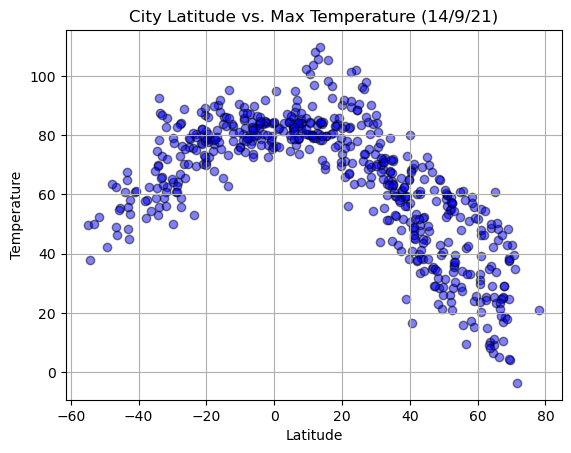

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = cities_df['Lat']
y_values = cities_df['Temp']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs. Max Temperature (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

Temperatures seem to gradually drop the farther people move from the equator.

#### Latitude Vs. Humidity

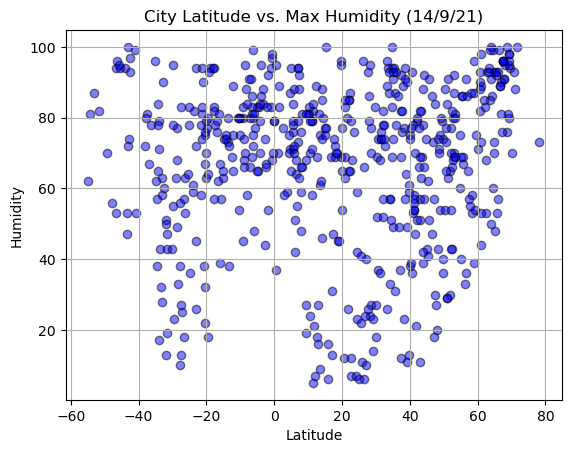

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = cities_df['Lat']
y_values = cities_df['Humidity']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Max Humidity (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

We can't establish any correlationship between Humidity and Latitude from this graph.

#### Latitude Vs. Cloudiness

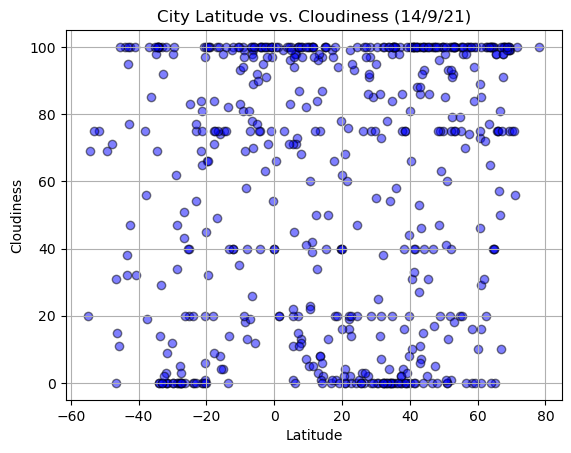

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
# Build scatter plot for latitude vs. temperature
x_values = cities_df['Lat']
y_values = cities_df['Clouds']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

This plot does not clearly suggest any significant relationship between a city's latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

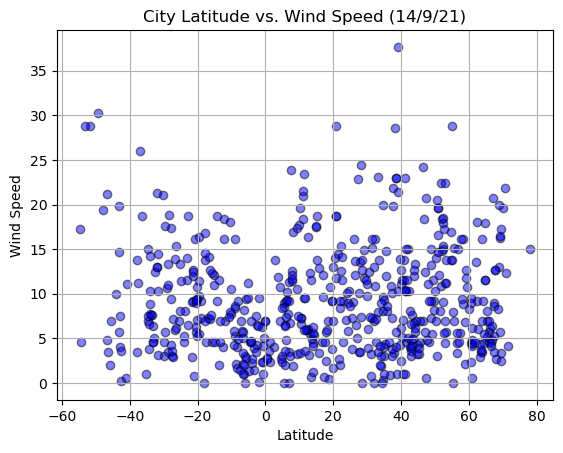

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
# Build scatter plot for latitude vs. temperature
x_values = cities_df['Lat']
y_values = cities_df['Wind']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

This graph doesn't suggest any correlationship between Latitude and Wind Speed.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_df = cities_df.loc[cities_df['Lat']>=0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Humidity,Temp,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
0,Haiku-Pauwela,20.9219,-156.3051,83,71.15,0,28.77,US,1681914147
1,Kapuskasing,49.4169,-82.4331,79,21.20,100,11.50,CA,1681914121
2,Stornoway,58.2093,-6.3865,53,59.04,0,16.11,GB,1681914147
3,Petropavlovsk-Kamchatsky,53.0452,158.6483,70,36.19,75,11.18,RU,1681914148
5,Shatrovo,56.5167,64.6333,36,42.03,0,4.43,RU,1681914082


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_df = cities_df.loc[cities_df['Lat']<0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Humidity,Temp,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
4,Coquimbo,-29.9533,-71.3436,55,64.13,0,4.61,CL,1681914148
9,Adamstown,-25.0660,-130.1015,78,75.92,20,13.38,PN,1681914149
12,Port Alfred,-33.5906,26.8910,43,87.60,14,7.65,ZA,1681914149
13,Ushuaia,-54.8000,-68.3000,62,49.66,20,17.27,AR,1681914087
16,Edinburgh Of The Seven Seas,-37.0676,-12.3116,67,62.56,100,26.02,SH,1681914151


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8432059574051772


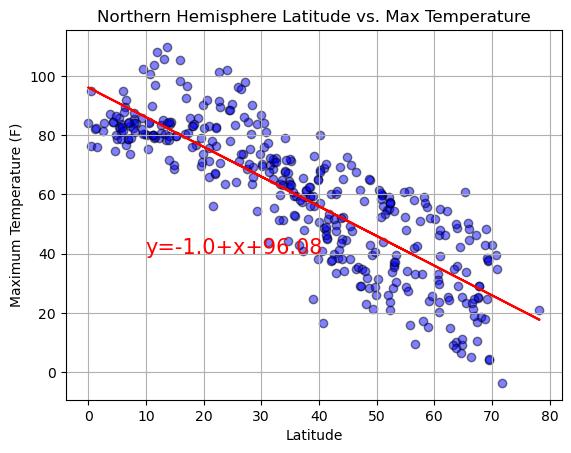

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_df['Lat']
y_values = northern_df['Temp']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Northern Hemisphere Latitude vs. Max Temperature')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(10,40),fontsize=15, color='r')
plt.show()

This graph shows a srong negatuve correlation between Latitide and Temperature. Because as cities in the northern hemisphere move cloer to the north pole and away from the equator, the temperature drops.

The r-value is: 0.72394847930141


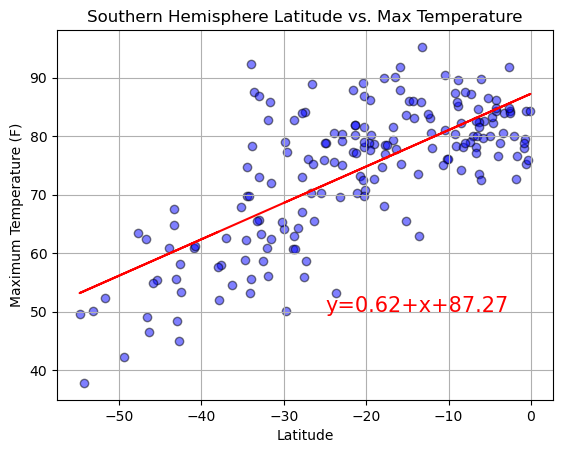

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_df['Lat']
y_values = southern_df['Temp']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Southern Hemisphere Latitude vs. Max Temperature')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(-25,50),fontsize=15, color='r')
plt.show()

<!-- **Discussion about the linear relationship:** YOUR RESPONSE HERE -->
There seems to be a strong relationship between latitude and temperature. Maximum temperature increases as we near the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2041567226412729


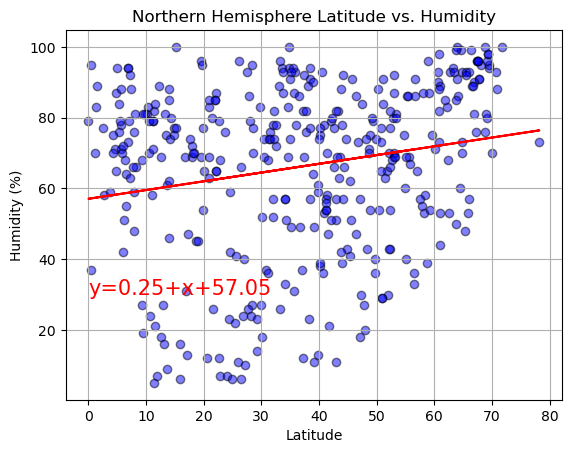

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(0,30),fontsize=15, color='r')
plt.show()

There's a slight correlation between Latitude and Humidty in cities of Northern Hemisphere.

The r-value is: 0.16861039849031198


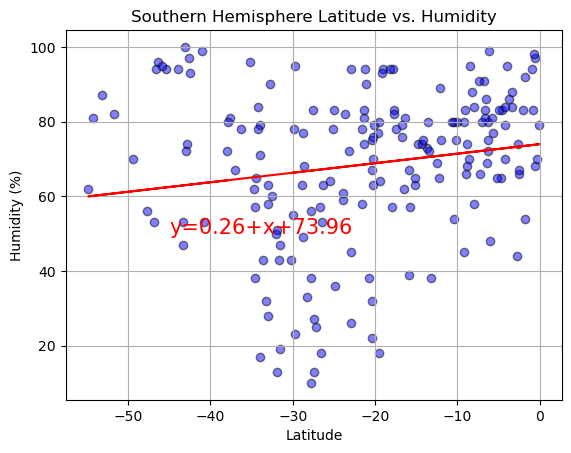

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(-45,50),fontsize=15, color='r')
plt.show()

<!-- **Discussion about the linear relationship:** YOUR RESPONSE HERE -->
Humidity increases as we near the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16849213459262627


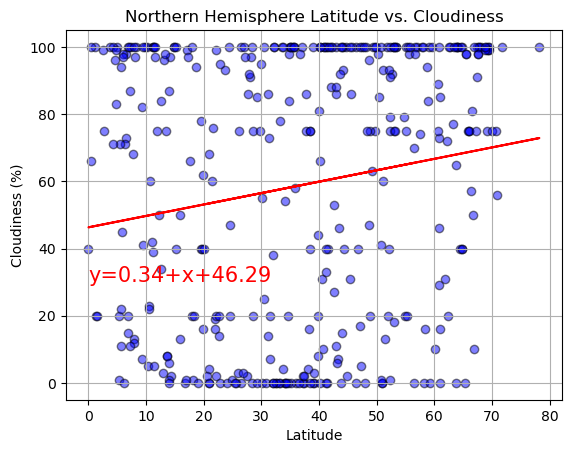

In [19]:
# Northern Hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Clouds']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(0,30),fontsize=15, color='r')
plt.show()
# YOUR CODE HERE

There seems to be a slight positive correlation between cloudiness and latitude for cities in the northern hemisphere.

The r-value is: 0.25739898716146253


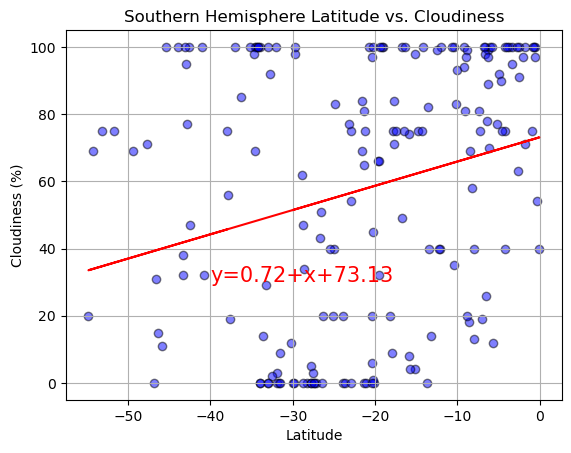

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_df['Lat']
y_values = southern_df['Clouds']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(-40,30),fontsize=15, color='r')
plt.show()

<!-- **Discussion about the linear relationship:** YOUR RESPONSE HERE -->
The cloudiness increases as we near the equator but this correation might be weak in the cities of southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0756770997335533


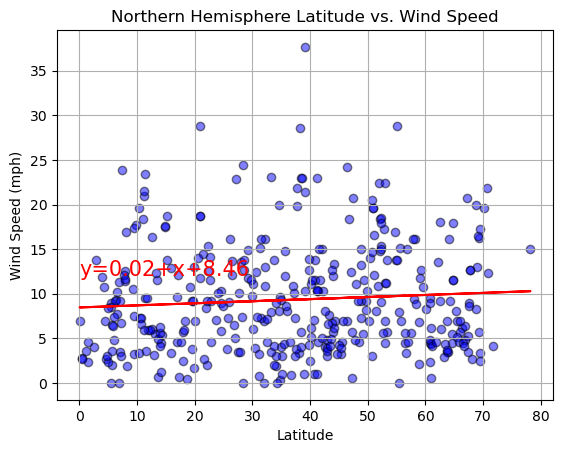

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_df['Lat']
y_values = northern_df['Wind']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(0,12),fontsize=15, color='r')
plt.show()

There seems to be no correlation between Latitude and Wind Speed in the cities of Northern Hemisphere

The r-value is: -0.3809190496877692


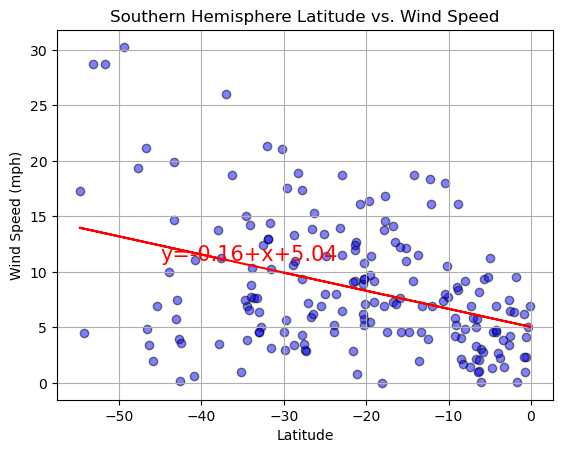

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_df['Lat']
y_values = southern_df['Wind']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(-45,11),fontsize=15, color='r')
plt.show()

<!-- **Discussion about the linear relationship:** YOUR RESPONSE HERE -->
Wind speed appears to be getting higher as cities are located nearer to the north, with no correlation with the equator.